<a href="https://colab.research.google.com/github/hytra46/Data-Analyst---Remote-Work-Health-Impact-Survey-2025/blob/main/Remote_Work_Health_Impact_Survey_2025_Henry_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Remote Work Health Impact Survey 2025
- **Nama:** Henry Saputra
- **Email:** henrysaputra008@gmail.com
- **Dashboard Tableau:** https://public.tableau.com/views/ProyekAkhirDataAnalyst/Dashboard3?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
- **Slide Deck:** https://drive.google.com/file/d/1ARwYnCvGrKNEewnthrJJkPNYijmcr8Uc/view?usp=drive_link

## Menentukan Pertanyaan

- Pertanyaan 1: Bagaimana proporsi pekerja remote dalam survei ini dan generasi mana yang paling mendominasi?
- Pertanyaan 2: Pekerjaan apa saja yang paling banyak diisi oleh pekerja remote, serta bagaimana gaji dan rata-rata jam kerja mereka?
- Pertanyaan 3: Bagaimana kondisi kesehatan mental pekerja remote?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Link Dataset**:

https://www.kaggle.com/datasets/pratyushpuri/remote-work-health-impact-survey-2025



**Deskripsi**:

Dataset Dampak Kesehatan Kerja Jarak Jauh Pascapandemi 2025 menyajikan gambaran global yang komprehensif tentang bagaimana pengaturan kerja jarak jauh, hibrida, dan di kantor memengaruhi kesehatan mental dan fisik karyawan di era pascapandemi. Dikumpulkan pada Juni 2025, dataset ini menggabungkan respons dari beragam tenaga kerja yang mencakup berbagai benua, industri, kelompok usia, dan peran pekerjaan. Dataset ini dirancang untuk mendukung penelitian, analisis data, dan pembuatan kebijakan seputar lanskap kerja dan kesejahteraan yang terus berkembang.

In [ ]:
# Memuat dataset day.csv ke dalam variabel remote_worker_df
remote_worker_df = pd.read_csv("/content/post_pandemic_remote_work_health_impact_2025.csv")

# Melihat 5 baris pertama remote_worker_df
remote_worker_df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


### Assessing Data

In [ ]:
# Memeriksa tipe data dari tiap kolom dan kelengkapan data.
remote_worker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [ ]:
# Memeriksa jumlah missing values data tiap kolom.
remote_worker_df.isna().sum()

,0
Survey_Date,0
Age,0
Gender,0
Region,0
Industry,0
Job_Role,0
Work_Arrangement,0
Hours_Per_Week,0
Mental_Health_Status,799
Burnout_Level,0


In [ ]:
# Memeriksa duplikasi data.
print("Jumlah duplikasi: ", remote_worker_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Memeriksa parameter statistik dari kolom numerik.
remote_worker_df.describe(include='all')

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
count,3157,3157.000000,3157,3157,3157,3157,3157,3157.000000,2358,3157,3157.000000,2877,3157.000000,3157
unique,26,NaN,4,6,9,24,3,NaN,6,3,NaN,31,NaN,5
top,2025-06-07,NaN,Male,South America,Professional Services,Research Scientist,Onsite,NaN,PTSD,Medium,NaN,Shoulder Pain; Eye Strain,NaN,$60K-80K
freq,137,NaN,1535,575,730,151,1562,NaN,423,1366,NaN,262,NaN,1014
mean,NaN,43.732024,NaN,NaN,NaN,NaN,NaN,49.904973,NaN,NaN,2.996516,NaN,2.704783,NaN
std,NaN,12.661095,NaN,NaN,NaN,NaN,NaN,8.897699,NaN,NaN,1.163307,NaN,1.188887,NaN
min,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,1.000000,NaN,1.000000,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,2.000000,NaN,2.000000,NaN
50%,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,3.000000,NaN,3.000000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,4.000000,NaN,4.000000,NaN


**Temuan:**
- Dataset memiliki missing value pada kolom Mental_Health_Status dan Physical_Health_Issues.
- Terdapat kesalahan tipe data untuk kolom Survey_Date.

### Cleaning Data

In [ ]:
# Mengisi missing value pada kolom Mental_Health_Status dan Physical_Health_Issues dengan nilai none
remote_worker_df[["Mental_Health_Status", "Physical_Health_Issues"]] = remote_worker_df[["Mental_Health_Status", "Physical_Health_Issues"]].fillna("none")

# Memeriksa jumlah missing values data tiap kolom.
remote_worker_df.isna().sum()

,0
Survey_Date,0
Age,0
Gender,0
Region,0
Industry,0
Job_Role,0
Work_Arrangement,0
Hours_Per_Week,0
Mental_Health_Status,0
Burnout_Level,0


In [ ]:
# Mengganti tipe data pada kolom Survey_Date menjadi datetime.
remote_worker_df["Survey_Date"] = pd.to_datetime(remote_worker_df["Survey_Date"])

# Memeriksa tipe data dari tiap kolom dan kelengkapan data.
remote_worker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Survey_Date              3157 non-null   datetime64[ns]
 1   Age                      3157 non-null   int64         
 2   Gender                   3157 non-null   object        
 3   Region                   3157 non-null   object        
 4   Industry                 3157 non-null   object        
 5   Job_Role                 3157 non-null   object        
 6   Work_Arrangement         3157 non-null   object        
 7   Hours_Per_Week           3157 non-null   int64         
 8   Mental_Health_Status     3157 non-null   object        
 9   Burnout_Level            3157 non-null   object        
 10  Work_Life_Balance_Score  3157 non-null   int64         
 11  Physical_Health_Issues   3157 non-null   object        
 12  Social_Isolation_Score   3157 non-

In [ ]:
# Mengelompokkan kolom Age dengan membuat kolom Generation yang berisi
# Baby Boomers = 1955 - 1964 # Generasi X = 1965 - 1980
# Millenials = 1981 - 1996
# Gen Z = 1997 - 2012

# Kolom age berisikan umur jadi harus dikurang terlebih dahulu dengan tahun 2025
remote_worker_df['Birth_Year'] = 2025 - remote_worker_df['Age']

def get_generation(birth_year):
    if 1955 <= birth_year <= 1964:
        return 'Baby Boomers'
    elif 1965 <= birth_year <= 1980:
        return 'Generasi X'
    elif 1981 <= birth_year <= 1996:
        return 'Millenials'
    elif 1997 <= birth_year <= 2012:
        return 'Gen Z'
    else:
        return 'Other'

remote_worker_df['Generation'] = remote_worker_df['Birth_Year'].apply(get_generation)

# Tampilkan Data
remote_worker_df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Birth_Year,Generation
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K,1998,Gen Z
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K,1988,Millenials
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K,1993,Millenials
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K,1985,Millenials
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,none,Medium,5,none,4,$60K-80K,1995,Millenials


In [ ]:
# Tampilkan unik data dari kolom generation beserta jumlah barisnya
remote_worker_df['Generation'].value_counts()

,count
Generation,
Generasi X,1198
Millenials,1111
Gen Z,489
Baby Boomers,359


**Pembaruan:**
- Mengisi missing value dengan nilai none.
- Mengubah tipe data Survey_Date ke datetime.
- Menambahkan kolom Birth_Year dan Generation

### Ekspor Data

In [ ]:
# Ekspor remote_worker_df ke csv
remote_worker_df.to_csv("remote_worker_df.csv", index=False)

## Exploratory Data Analysis (EDA)

###Pertanyaan 1


Bagaimana proporsi pekerja remote dalam survei ini dan generasi mana yang paling mendominasi?

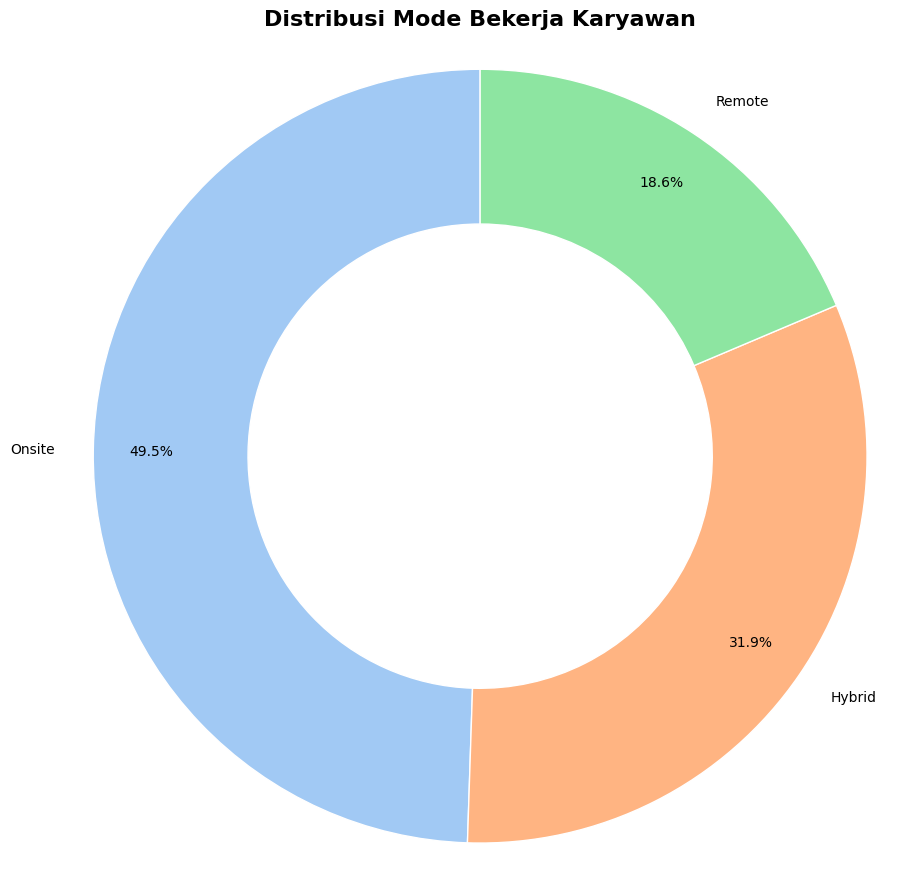

In [ ]:
# Proporsi Work_Arrangement dengan menggunakan donat chart
plt.figure(figsize=(9, 9))
work_arrangement_counts = remote_worker_df['Work_Arrangement'].value_counts()

# Get a color palette from seaborn for better aesthetics
colors = sns.color_palette('pastel')[0:len(work_arrangement_counts)]

plt.pie(work_arrangement_counts,
        labels=work_arrangement_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85, # Adjust distance of percentage labels from the center
        wedgeprops=dict(width=0.4, edgecolor='w')) # Wider inner circle with white edge for separation

# Draw a white circle in the center to explicitly create the donut hole
centre_circle = plt.Circle((0,0), 0.20, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribusi Mode Bekerja Karyawan', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

/tmp/ipython-input-607574579.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=remote_generation_counts.values, y=remote_generation_counts.index, palette='viridis')


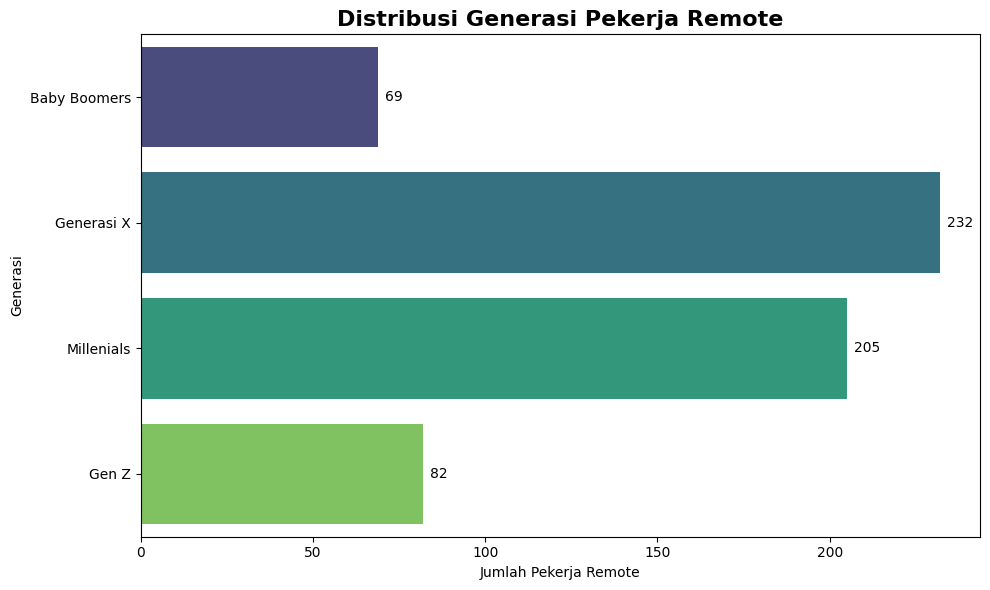

In [ ]:
# Distibusi Generation dengan filter 'Work_Arrangement' = remote.
# Buat visualisasi dengan horizontal bar chart menggunakan seaborn.
# Buat yang sederhana agar mudah dipahami pembaca

remote_generation_counts = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']['Generation'].value_counts()

# Define the desired order for generations
generation_order = ['Baby Boomers', 'Generasi X', 'Millenials', 'Gen Z']

# Reindex the series to enforce the desired order
remote_generation_counts = remote_generation_counts.reindex(generation_order)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=remote_generation_counts.values, y=remote_generation_counts.index, palette='viridis')

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

plt.title('Distribusi Generasi Pekerja Remote', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Pekerja Remote')
plt.ylabel('Generasi')
plt.tight_layout()
plt.show()

**Insight**:

Secara keseluruhan, remote worker hanya mencakup sekitar 19%, jumlah yang masih lebih rendah dibandingkan mode kerja lainnya. Kelompok ini didominasi oleh Generasi X dan Milenials.

###Pertanyaan 2

Pekerjaan apa saja yang paling banyak diisi oleh pekerja remote, serta bagaimana gaji dan rata-rata jam kerja mereka?

/tmp/ipython-input-845638259.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_remote_industries.values, y=top_5_remote_industries.index, palette='viridis')


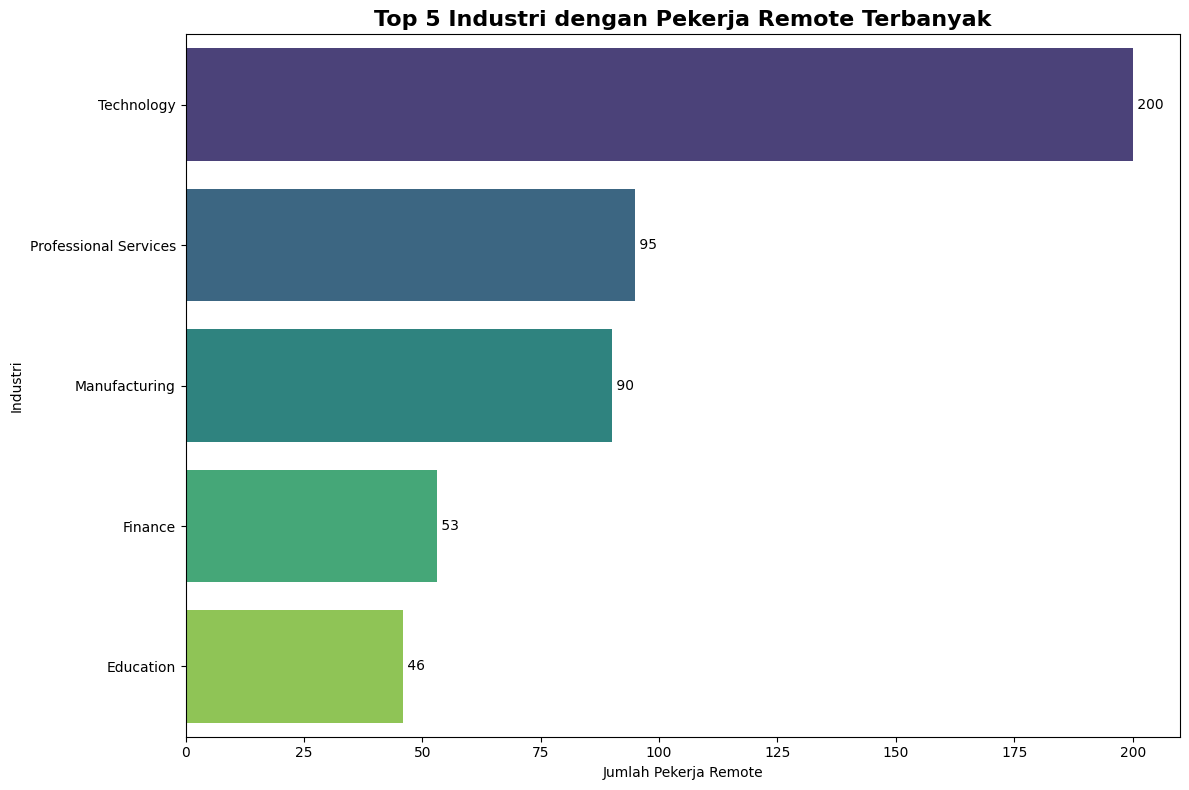

In [ ]:
# Top 5 dari kolom Industry menggunakan horizontal chart dengan seaborn
# Filter for remote workers
remote_workers_df_filtered = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']

# Get the top 5 industries for remote workers
top_5_remote_industries = remote_workers_df_filtered['Industry'].value_counts().head(5)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_remote_industries.values, y=top_5_remote_industries.index, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(top_5_remote_industries.values):
    plt.text(value, index, f' {value}', va='center')

plt.title('Top 5 Industri dengan Pekerja Remote Terbanyak', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Pekerja Remote')
plt.ylabel('Industri')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1657848645.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_remote_job_roles.values, y=top_5_remote_job_roles.index, palette='viridis')


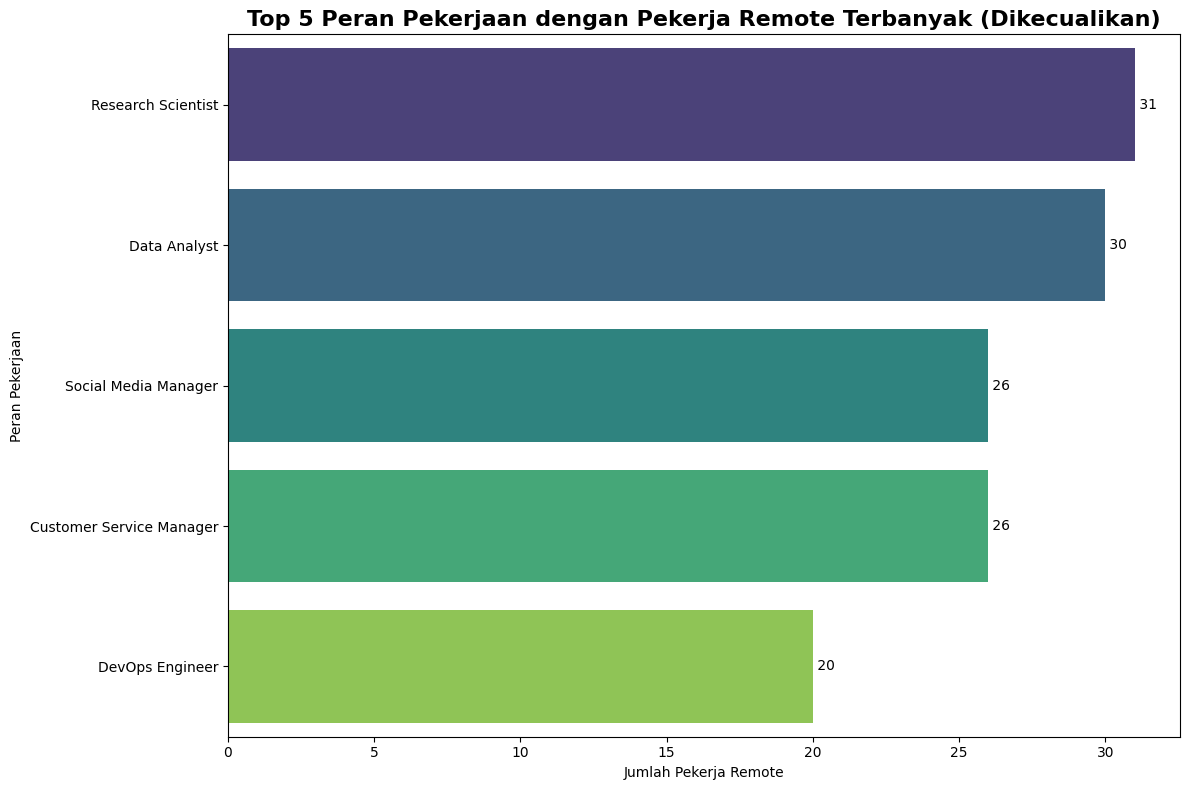

In [ ]:
# Filter for remote workers
remote_workers_df_filtered = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']

# Exclude specified job roles
excluded_roles = ['Financial Analyst', 'Executive Assistant', 'Content Writer', 'Sales Representative', 'Content Writer', 'Consultant', 'Business Analyst', 'HR Manager', 'Technical Writer', 'Digital Marketing Specialist', 'Software Engineer','UX Designer', 'Project Manager', 'Operations Manager', 'Quality Assurance', 'Product Manager', 'IT Support', 'Data Scientist']
remote_workers_df_filtered = remote_workers_df_filtered[~remote_workers_df_filtered['Job_Role'].isin(excluded_roles)]

# Get the new top 5 job roles for remote workers after exclusion
top_5_remote_job_roles = remote_workers_df_filtered['Job_Role'].value_counts().head(5)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_remote_job_roles.values, y=top_5_remote_job_roles.index, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(top_5_remote_job_roles.values):
    plt.text(value, index, f' {value}', va='center')

plt.title('Top 5 Peran Pekerjaan dengan Pekerja Remote Terbanyak (Dikecualikan)', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Pekerja Remote')
plt.ylabel('Peran Pekerjaan')
plt.tight_layout()
plt.show()

**Insight**:

Industri Technology menjadi sektor yang paling banyak mempekerjakan remote worker. Dari sisi peran, Research Scientist dan Data Analyst merupakan posisi yang paling dominan di lingkungan kerja jarak jauh. Kedua peran ini identik dengan pekerjaan berbasis analisis dan riset yang dapat dilakukan secara mandiri, sehingga model kerja jarak jauh menjadi pilihan yang lebih efisien. Temuan ini juga menggambarkan bahwa transformasi digital pascapandemi semakin membuka peluang bagi profesi yang tidak terikat ruang fisik.

/tmp/ipython-input-3329119446.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_range_counts.values, y=salary_range_counts.index, palette='viridis')


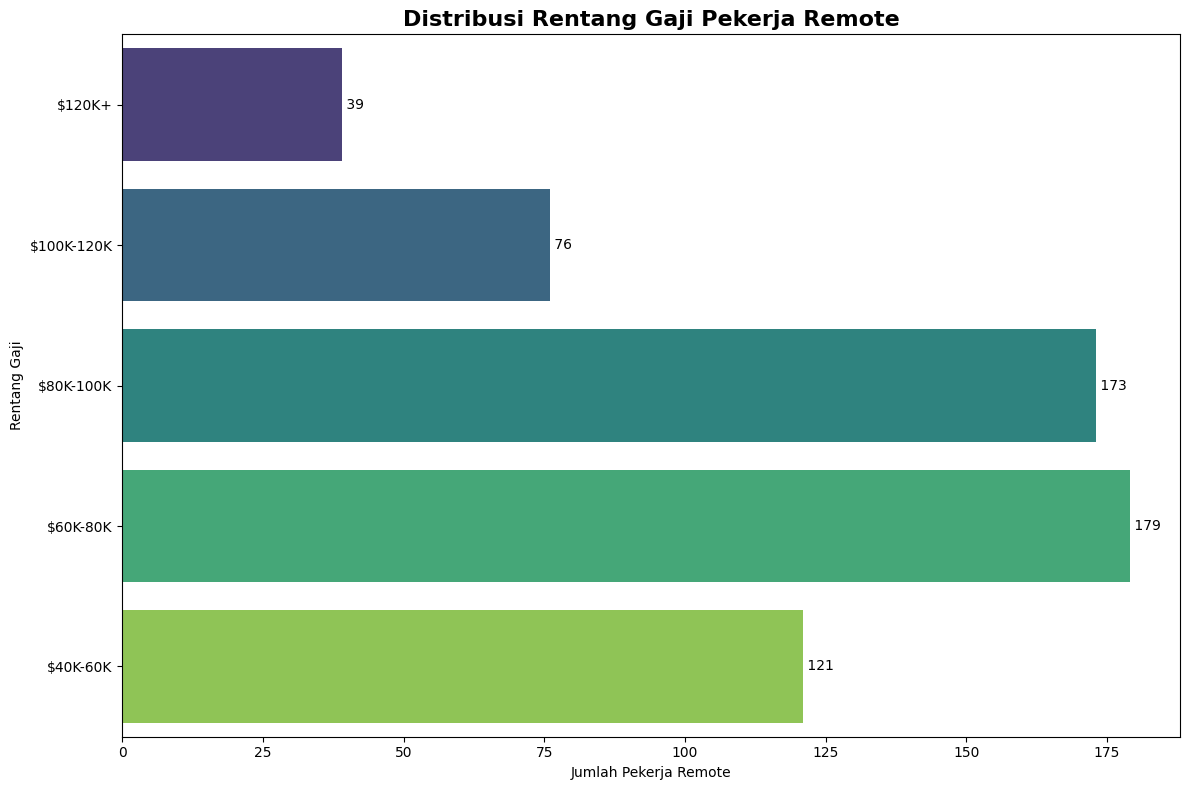

In [ ]:
# Filter for remote workers
remote_salary_df = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']

# Get the count of each salary range
salary_range_counts = remote_salary_df['Salary_Range'].value_counts()

# Define a custom order for salary ranges, placing '$40K-60K' at the end
custom_salary_order = [
    '$120K+',
    '$100K-120K',
    '$80K-100K',
    '$60K-80K',
    '$40K-60K'  # This will be at the bottom of the chart
]

# Reindex the series to enforce the custom order
salary_range_counts = salary_range_counts.reindex(custom_salary_order)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=salary_range_counts.values, y=salary_range_counts.index, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(salary_range_counts.values):
    plt.text(value, index, f' {value}', va='center')

plt.title('Distribusi Rentang Gaji Pekerja Remote', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Pekerja Remote')
plt.ylabel('Rentang Gaji')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Rata-rata Hours_Per_Week untuk pekerja remote
remote_hours_per_week = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']['Hours_Per_Week'].mean()

# Tampilkan dengan score card
print(f"Rata-rata Jam Kerja per Minggu untuk Pekerja Remote: {remote_hours_per_week:.2f} jam")

Rata-rata Jam Kerja per Minggu untuk Pekerja Remote: 49.87 jam


**Insigth**:

Pekerja remote sebagian besar mendapatkan gaji di kisaran $60K–$80K hingga $80K–$100K per tahun, menunjukkan bahwa pendapatan mereka tergolong cukup tinggi. Namun di balik kompensasi tersebut, rata-rata jam kerja mereka mencapai 50 jam per minggu. Ini menunjukkan bahwa fleksibilitas kerja jarak jauh tidak selalu berarti waktu kerja yang lebih sedikit. Banyak dari mereka masih harus mengikuti ritme kerja yang cukup panjang dan menghadapi tantangan untuk menjaga keseimbangan antara pekerjaan dan kehidupan pribadi.

###Pertanyaan 3

Bagaimana kondisi kesehatan mental pekerja remote?

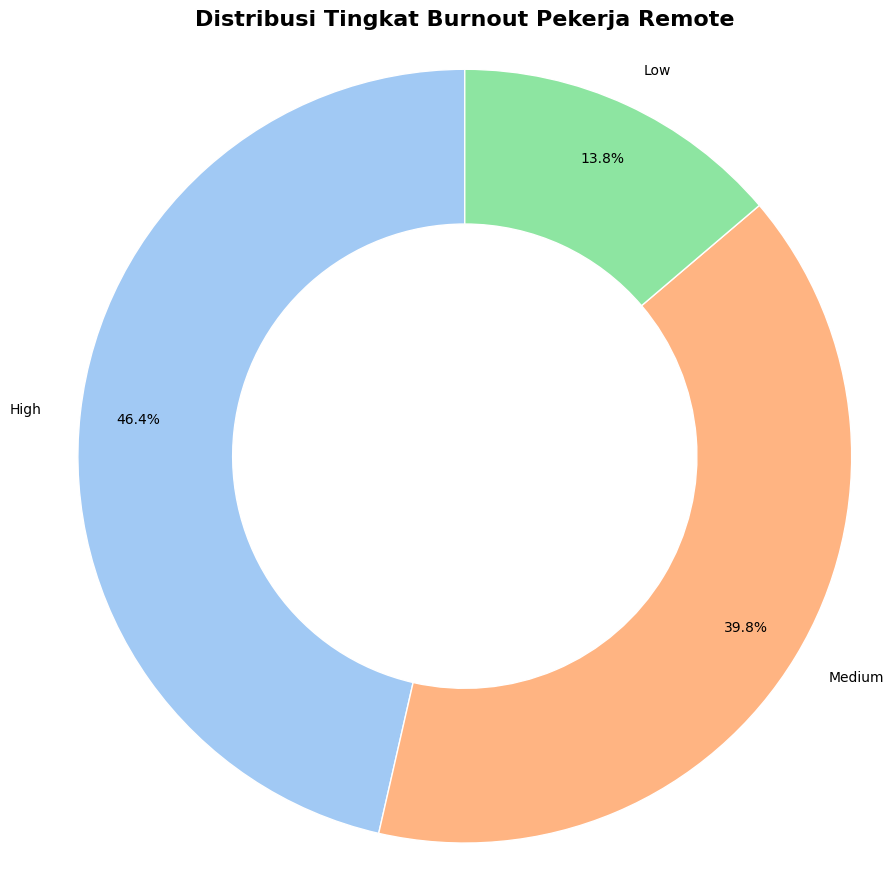

In [ ]:
# Proporsi burnout level untuk pekerja remote menggunakan donat chart dengan seaborn
plt.figure(figsize=(9, 9))

# Filter for remote workers
remote_workers_burnout_df = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']
burnout_level_counts = remote_workers_burnout_df['Burnout_Level'].value_counts()

# Get a color palette from seaborn for better aesthetics
colors = sns.color_palette('pastel')[0:len(burnout_level_counts)]

plt.pie(burnout_level_counts,
        labels=burnout_level_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85, # Adjust distance of percentage labels from the center
        wedgeprops=dict(width=0.4, edgecolor='w')) # Wider inner circle with white edge for separation

# Draw a white circle in the center to explicitly create the donut hole
centre_circle = plt.Circle((0,0), 0.20, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribusi Tingkat Burnout Pekerja Remote', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

/tmp/ipython-input-3821380618.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mental_health_issues.values, y=top_5_mental_health_issues.index, palette='viridis')


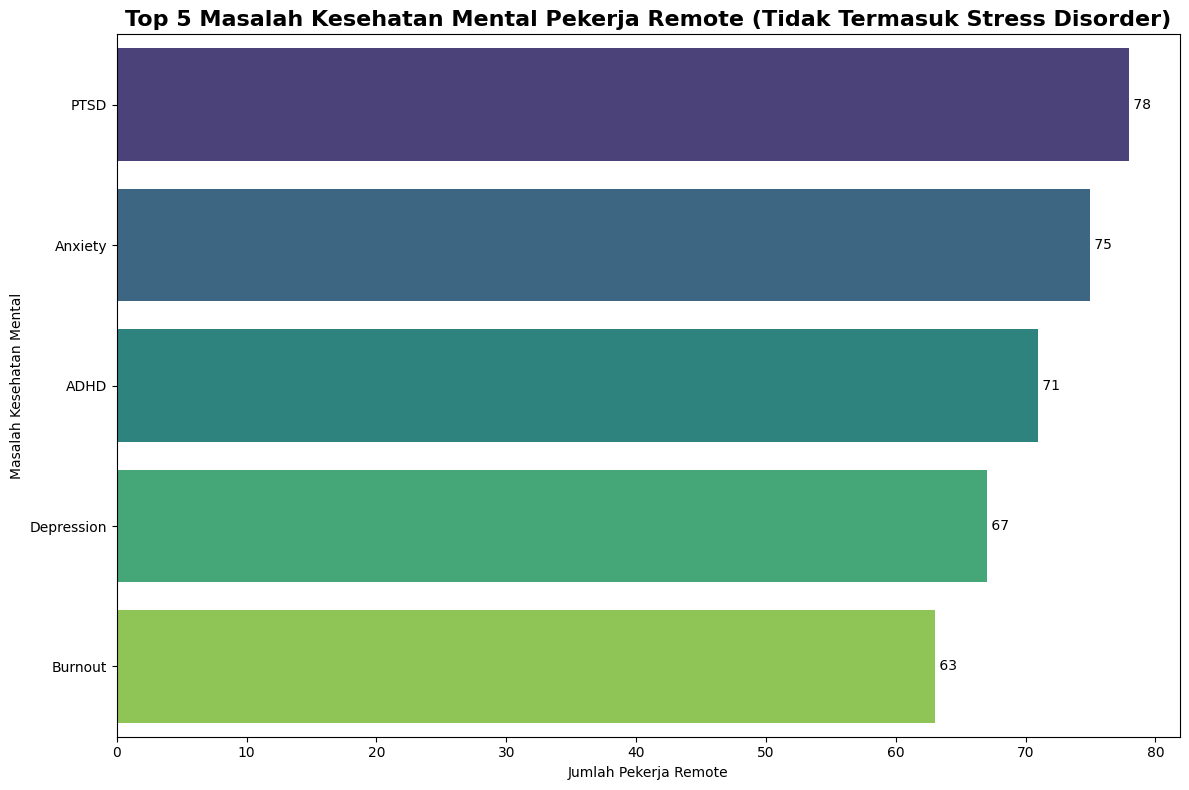

In [ ]:
# Mental Issues hanya pekerja remote menggunakan horizontal barchart top 5 saja dengan seaborn
# Filter for remote workers
remote_mental_health_df = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']

# Get the count of each Mental_Health_Status, excluding 'none' and 'Stress Disorder'
mental_health_counts = remote_mental_health_df['Mental_Health_Status'].value_counts()
excluded_issues = ['none', 'Stress Disorder']
mental_health_counts = mental_health_counts[~mental_health_counts.index.isin(excluded_issues)]

# Get the top 5 mental health issues
top_5_mental_health_issues = mental_health_counts.head(5)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_mental_health_issues.values, y=top_5_mental_health_issues.index, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(top_5_mental_health_issues.values):
    plt.text(value, index, f' {value}', va='center')

plt.title('Top 5 Masalah Kesehatan Mental Pekerja Remote (Tidak Termasuk Stress Disorder)', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Pekerja Remote')
plt.ylabel('Masalah Kesehatan Mental')
plt.tight_layout()
plt.show()

**Insight**:

Burnout menjadi tantangan besar bagi pekerja remote. Sebanyak 46% berada pada level tinggi dan 40% pada level medium. Gangguan seperti PTSD, Anxiety, dan ADHD juga muncul sebagai mental issues yang paling sering dialami. Temuan ini menunjukkan bahwa bekerja dari rumah tidak selalu memberikan kenyamanan, ada resiko tekanan dan beban mental yang ikut menyertainya.

/tmp/ipython-input-2352717156.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wlb_counts.index, y=wlb_counts.values, palette='viridis')


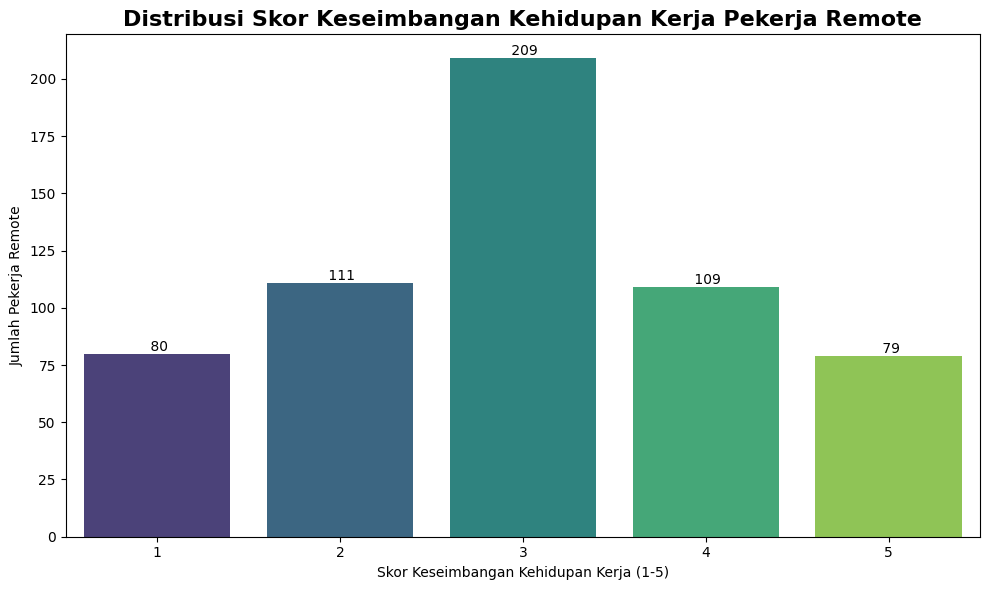

In [ ]:
# Work Life Balance dengan urutan 1 - 5 barchart menggunakan seaborn
# Filter for remote workers
remote_wlb_df = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']

# Get the count of each Work_Life_Balance_Score
wlb_counts = remote_wlb_df['Work_Life_Balance_Score'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=wlb_counts.index, y=wlb_counts.values, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(wlb_counts.values):
    plt.text(index, value, f' {value}', ha='center', va='bottom')

plt.title('Distribusi Skor Keseimbangan Kehidupan Kerja Pekerja Remote', fontsize=16, fontweight='bold')
plt.xlabel('Skor Keseimbangan Kehidupan Kerja (1-5)')
plt.ylabel('Jumlah Pekerja Remote')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Social Issolation dengan urutan 1 - 5 barchart menggunakan seaborn

/tmp/ipython-input-1800069379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=social_isolation_counts.index, y=social_isolation_counts.values, palette='viridis')


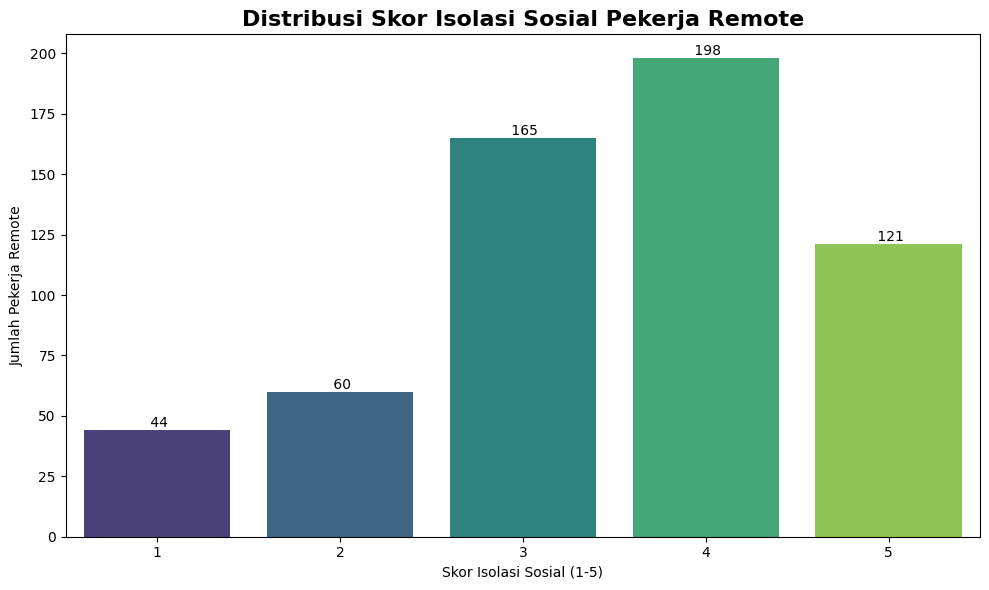

In [ ]:
# Social Issolation dengan urutan 1 - 5 barchart menggunakan seaborn
# Filter for remote workers
remote_social_isolation_df = remote_worker_df[remote_worker_df['Work_Arrangement'] == 'Remote']

# Get the count of each Social_Isolation_Score
social_isolation_counts = remote_social_isolation_df['Social_Isolation_Score'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=social_isolation_counts.index, y=social_isolation_counts.values, palette='viridis')

# Add data labels to each bar
for index, value in enumerate(social_isolation_counts.values):
    plt.text(index, value, f' {value}', ha='center', va='bottom')

plt.title('Distribusi Skor Isolasi Sosial Pekerja Remote', fontsize=16, fontweight='bold')
plt.xlabel('Skor Isolasi Sosial (1-5)')
plt.ylabel('Jumlah Pekerja Remote')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight**:

Sebagian besar pekerja remote menilai work-life balance mereka berada di skor 3, yang berarti berada pada tingkat ‘cukup’ tetapi belum betul-betul nyaman. Namun yang paling menonjol adalah rasa isolasi sosial yang mereka rasakan. Skor isolasi 4 menjadi yang paling banyak muncul—menggambarkan tingkat kesepian yang cukup tinggi—diikuti skor 3 yang menunjukkan kesepian sedang, dan skor 5 yang mencerminkan tingkat isolasi yang lebih parah. Temuan ini memperlihatkan bahwa banyak pekerja remote mengalami kesepian dan keterbatasan interaksi sosial sebagai tantangan utama dalam bekerja dari rumah.

## Conclusion & Recomendation

- **Conclusion**: Analisis ini menunjukkan bahwa bekerja jarak jauh tidak selalu seideal yang dibayangkan. Meski banyak pekerja remote berasal dari industri teknologi dengan pendapatan yang cukup tinggi, mereka tetap menghadapi jam kerja yang panjang, tingkat burnout yang tinggi, serta risiko gangguan mental seperti PTSD, Anxiety, dan ADHD. Work-life balance umumnya berada di tingkat sedang, sementara isolasi sosial menjadi tantangan utama. Temuan ini menegaskan bahwa fleksibilitas remote work disertai konsekuensi nyata terhadap kesehatan mental, fisik, dan kesejahteraan sosial pekerja.


- **Recomendation**: Untuk menciptakan pengalaman kerja jarak jauh yang lebih sehat, perusahaan perlu lebih proaktif dalam mengatur jam kerja, memperjelas kebijakan work-life balance, dan menyediakan dukungan kesehatan mental. Ruang interaksi virtual, check-in rutin, dan akses konseling juga penting untuk mengurangi rasa isolasi. Dengan pendekatan yang lebih human-centered, kerja jarak jauh dapat menjadi lingkungan yang produktif sekaligus menjaga kesejahteraan pekerja.